<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [21]:
# autoreload updated and newly installed packages
# without having to restart Jupyter kernel
%load_ext autoreload
%autoreload 2
# Some little interaction with matplotlib,
# although this botebook tries to only use plotly.
%matplotlib inline                
# Avoid using Jedi for faster autocomplete (tab)
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# Standard imports
import datetime
import platform
import os
import sys
from typing import List
# Non-standard imports
import matplotlib
import matplotlib.pyplot as plt
import numba as nb
import numpy as np
import plotly.graph_objs as go
# py-fatigue import
import py_fatigue as pf
# Paths of this tutorial and of the data
TUTORIAL_PATH = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(TUTORIAL_PATH, "Data")
if not TUTORIAL_PATH in sys.path:
    sys.path.append(TUTORIAL_PATH)
np.set_printoptions(threshold=sys.maxsize)

In [41]:
print(f"Platform: {platform.platform()}")
print(f"Python version: {sys.version}")
print(f"py-fatigue version: {pf.styling.TermColors.CBOLD}{pf.__version__}")

print(f"\
{pf.styling.TermColors.CBOLD}\
{pf.styling.TermColors.CBLUE}")
      
print(f"DATA_PATH = {DATA_PATH}")
print(f"TUTORIAL_PATH = {TUTORIAL_PATH}")

print(f"{pf.styling.TermColors.CEND}")

Platform: Linux-6.8.0-52-generic-x86_64-with-glibc2.2.5
Python version: 3.8.15 (default, Nov  6 2022, 02:12:40) 
[Clang 14.0.3 ]
py-fatigue version: 1.2.1

DATA_PATH = /home/pietro.dantuono@24SEA.local/Projects/MAXWind/py_fatigue/Data
TUTORIAL_PATH = /home/pietro.dantuono@24SEA.local/Projects/MAXWind/py_fatigue



In [24]:
plt.rcParams["figure.figsize"] = (7, 3.5)
plt.rcParams["font.family"] = ["serif"]
plt.rcParams["font.size"] = 10
plt.rcParams["lines.markersize"] = 3
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["grid.color"] = "#DDDDDD"
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["ytick.left"] = False
plt.rcParams["ytick.labelleft"] = True

In [25]:
# pf.ParisCurve??

In [26]:
SIF = np.linspace(1,2500, 300)
SLOPE_1 = np.array([2.88, 8.16])
INTERCEPT_1 = np.array([1.21E-16, 3.98E-29])
SLOPE_2 = np.array([8.16, 2.88])
INTERCEPT_2 = np.array([1.21E-26, 3.98E-13])
SLOPE_3 = np.array([8.16])
INTERCEPT_3 = np.array([1.21E-26])
THRESHOLD = 75.
CRITICAL = 2000.

In [27]:
# SN curves definition
pc_1 = pf.ParisCurve(slope=SLOPE_1, intercept=INTERCEPT_1, norm="The norm",
                     environment="Environment", curve="nr. 1")
pc_2 = pf.ParisCurve(slope=SLOPE_1, intercept=INTERCEPT_1,threshold=THRESHOLD,
                     critical=CRITICAL, norm="The norm",
                     environment="Environment", curve="nr. 2")

In [28]:
# SN curves definition
pc_3 = pf.ParisCurve(slope=SLOPE_2, intercept=INTERCEPT_2, norm="The norm",
                     environment="Environment", curve="nr. 3")
pc_4 = pf.ParisCurve(slope=SLOPE_2, intercept=INTERCEPT_2,threshold=THRESHOLD,
                     critical=CRITICAL, norm="The norm",
                     environment="Environment", curve="nr. 4")

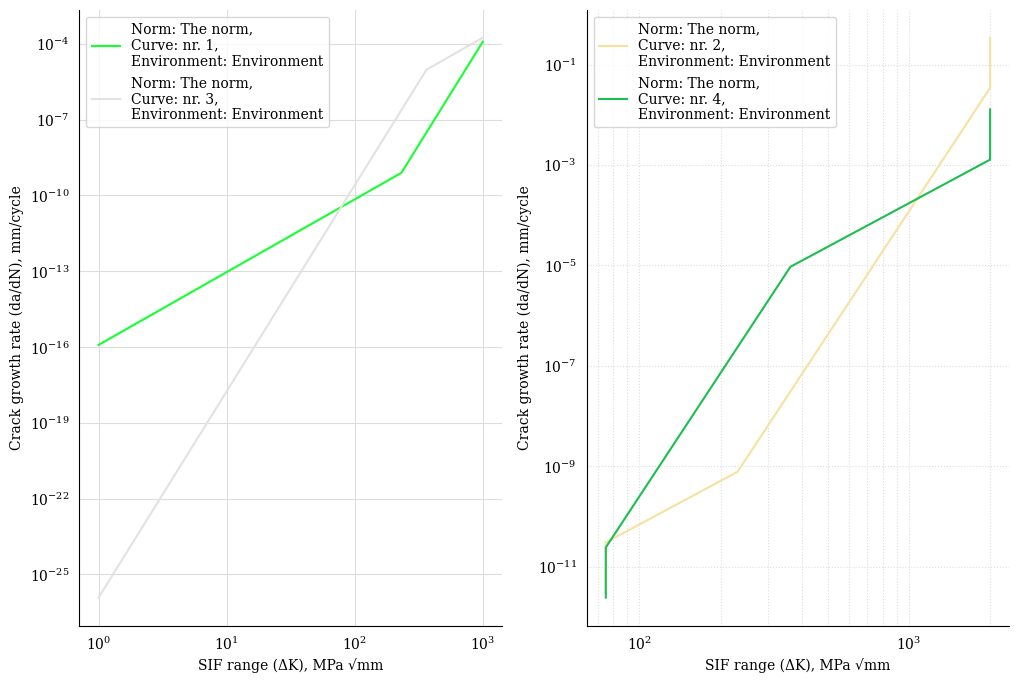

In [29]:
fig, axs = plt.subplots(1,2, figsize=(12, 8))
pc_1.plot(fig=fig, ax=axs[0],)
pc_3.plot(fig=fig, ax=axs[0],)
pc_2.plot(fig=fig, ax=axs[1],)
pc_4.plot(fig=fig, ax=axs[1],)
axs[0].legend()
axs[1].legend()
plt.show()

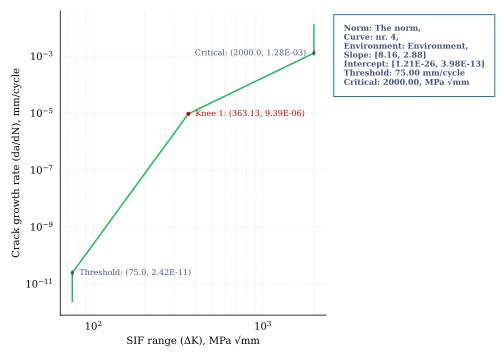

In [30]:
pc_4

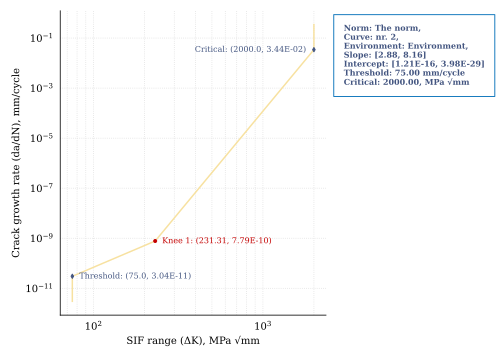

In [31]:
pc_2

In [32]:
pc_4.threshold_growth_rate

2.4170480248964612e-11

In [33]:
SIF = np.linspace(1,2500, 300)
SLOPE_5 = np.array([2.88, 5.1, 8.16, 5.1, 2.88])
INTERCEPT_5 = np.array([1E-16, 1E-20, 1E-27, 1E-19, 1E-13])
THRESHOLD = 20
CRITICAL = 2000

In [34]:
pc_5 = pf.ParisCurve(slope=SLOPE_5, intercept=INTERCEPT_5, threshold=THRESHOLD,
                     critical=CRITICAL, norm="The norm",
                     environment="Environment", curve="nr. 4")

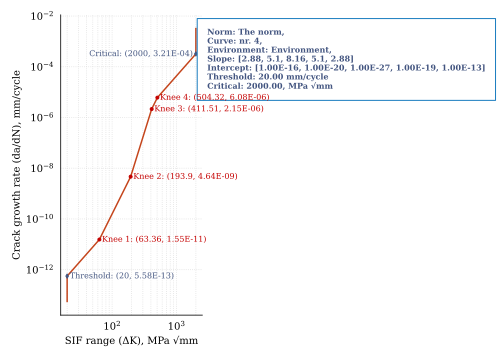

In [35]:
pc_5

In [36]:
pc_5.get_knee_sif()

array([ 63.35804993, 193.9017369 , 411.50876026, 504.31594872])

In [37]:
knee_points = """
80.583604379894450, 9.887106678564594e-8
129.64320542294902, 0.000001144127944652
625.42695187228510, 0.000139693512993757
1237.0283249422757, 0.000961788649599517
"""

# Convert the string data to a list of lists
knee_points_list = [list(map(float, line.split(',')))
                    for line in knee_points.strip().split('\n')]
knee_points_list = np.array(knee_points_list)


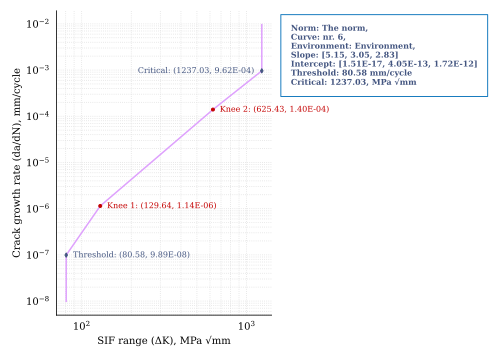

In [38]:
pc6 = pf.ParisCurve.from_knee_points(knee_sif=knee_points_list[:,0],
                                     knee_growth_rate=knee_points_list[:,1],
                                     norm="The norm", environment="Environment",
                                     curve="nr. 6")
pc6

In [39]:
pc6.get_knee_sif()

array([129.64320542, 625.42695187])

## Crack propagation analysis

In [40]:
time = pf.testing.get_sampled_time(10, 1000000)

AttributeError: module 'py_fatigue' has no attribute 'testing'

In [ ]:
data = pf.testing.get_random_data(t=time, range_=250)

In [ ]:
plt.plot(time, data, c="k", lw=0.5)
plt.xlabel("Time, s")
plt.ylabel("Stress, MPa")
plt.show()

In [ ]:
cc = pf.CycleCount.from_timeseries(data=data, time=time, range_bin_width=1.25, mean_bin_width=1.25, name="Signal")

In [ ]:
cc

In [ ]:
# cc.plot_histogram()

In [ ]:
# cg = pf.crack_growth.get_crack_growth(cc, pc_2, 15.)

In [ ]:
# cg.crack_size[-1]

In [ ]:
# plt.loglog(np.cumsum(cc.count_cycle[:len(cg.crack_size)]), cg.crack_size[1:])

In [ ]:
# cg.get_knees_sif

𝜋m∕2 (m∕2 − 1) C(gΔ𝜎i)m ̂ Ni

In [ ]:
pc = pf.ParisCurve(intercept=pc_3.intercept[0], slope=pc_3.slope[0])  #, critical=350, threshold=230)
# pc = pf.ParisCurve(intercept=1e-20, slope=4.1)  #, critical=350, threshold=230)
# pc = pf.ParisCurve(intercept=2e-15, slope=5.1)  #, critical=350, threshold=230)
# pc = pf.ParisCurve(intercept=1e-7, slope=2.000001)  #, critical=350, threshold=230)

In [ ]:
pc

In [ ]:
max_ = 1000
data = np.empty((3000000,))
data[::2] = max_ / 2
data[1::2] = - max_ / 2

In [ ]:
cc = pf.CycleCount(
    count_cycle=np.ones(10000000),
    stress_range=max_ * np.ones(10000000),
    mean_stress=np.zeros(10000000)
)

In [ ]:
cc

In [ ]:
scale_ = [1, 2/3, 4/7, 1/2, 3/7]
scale_ = scale_[-1]
# Renaming Paris constants
m  = slope = pc.slope[0]
C  = intercept = pc.intercept[0]
Δσ = scf = max_ * scale_ 
Y  = 1
aⁱ = initial_size = 1
aᶠ = 1e1000
π  = np.pi

In [ ]:
analytical = 2 / (2 - slope) / intercept * np.pi ** (-slope / 2) \
    * scf ** (-slope) * (-(initial_size ** (1 - slope / 2)))
print("Analytically integrated Nᶠ:", int(analytical))

In [ ]:
Nᶠ = 2 / (2 - m) / C * π ** (-m / 2) * (Y * Δσ) ** (-m) \
    * (- aⁱ ** (1 - m / 2)) if m != 2 else \
    1 / (C * π * (Y * Δσ) ** m) * np.log(aᶠ/aⁱ)
print("Analytically integrated Nᶠ:", int(Nᶠ))

In [ ]:
Nᶠ = 2 / (2 - m) / C * π ** (-m / 2) * (Y * Δσ) ** (-m) \
    * (aᶠ ** (1 - m / 2) - aⁱ ** (1 - m / 2)) if m != 2 else \
    1 / (C * π * (Y * Δσ) ** m) * np.log(aᶠ/aⁱ)
print("Analytically integrated Nᶠ:", int(Nᶠ))

In [ ]:
# geo = pf.HollowCylinder(
#     initial_depth=1.,
#     thickness=80.,
#     height=3000.,
#     outer_diameter=3000.,
#     crack_position="external"
# )

geo = pf.geometry.InfiniteSurface(initial_depth=1.)
print(geo)

In [ ]:
geo = pf.geometry.HollowCylinder(
    initial_depth=1.,
    thickness=1000.,
    height=3000.,
    outer_diameter=3000.,
    crack_position="external"
)

In [ ]:
geo

In [ ]:
cg = pf.crack_growth.get_crack_growth(
    cc * scale_, pc, geo
)
print(f"Cycles to failure: {int(cg.final_cycles)}")

In [ ]:
print(cg.crack_depth)
print(cg.crack_type)
print(cg.crack_geometry)


In [ ]:
cc_ca = pf.CycleCount(
    count_cycle=np.array([9999999.]),
    stress_range=np.array([max_]),
    mean_stress=np.array([0])
)

In [ ]:
cg_ca = pf.crack_growth.get_crack_growth(cc_ca * scale_, cg_curve=pc, crack_geometry=geo, express_mode=True)

In [ ]:
cg_ca.final_cycles

In [ ]:
knee_points = """
   29, 6.93e-14
   30, 8.64e-13
   35, 4.98e-12
   50, 2.50e-11
   72, 1.44e-10
  800, 1.18e-6
1_200, 1.87e-5
1_300, 3.10e-4
"""
# Convert the string data to a list of lists
knee_points_list = [list(map(float, line.split(',')))
                    for line in knee_points.strip().split('\n')]
knee_points_list = np.array(knee_points_list)

c_fkp = pf.ParisCurve.from_knee_points(knee_sif=knee_points_list[:,0],
                                       knee_growth_rate=knee_points_list[:,1],
                                       norm="Simil-NASGRO",
                                       environment="N/A", curve="Interpolated")
# Plotting
fig, ax = plt.subplots(1,1)
c_fkp.plot(fig=fig, ax=ax)
ax.legend(prop={'size': 8})
plt.show()

In [ ]:
# Walker's law constants
plt.rcParams["figure.figsize"] = (3.5, 7)
plt.rcParams["font.family"] = ["serif"]
plt.rcParams["font.size"] = 9
# SLOPE = 4.
# INTERCEPT = 1.21E-16
SLOPES = c_fkp.slope
INTERCEPTS = c_fkp.intercept
THRESHOLD = c_fkp.threshold
CRITICAL = c_fkp.critical
WALKER_EXPONENT = 0.5
LOAD_RATIOS = [0, 0.1, 0.5, 0.7]
THRESHOLDS = THRESHOLD * (1 - np.array(LOAD_RATIOS)) ** (1 - WALKER_EXPONENT)
CRITICALS = CRITICAL * (1 - np.array(LOAD_RATIOS)) ** (1 - WALKER_EXPONENT)

# Walker's curve definition

walker_curves = [pf.ParisCurve(slope=SLOPES, intercept=INTERCEPTS,
                                walker_exponent=WALKER_EXPONENT,
                                threshold=t, critical=c, load_ratio=l, 
                                norm="The norm", environment="Environment",
                                curve=f"load_ratio={l}")
                 for l, t, c in zip(LOAD_RATIOS, THRESHOLDS, CRITICALS)]

# Plotting
fig, ax = plt.subplots(1,1)
for pc in walker_curves:
    pc.plot(fig=fig, ax=ax)
ax.legend(prop={'size': 8})
plt.show()